#  Applying the Cross Industry Standard Process for Data Mining (CRISP-DM) on Oslo Airbnb Data

## Table of Contents
[Business Understanding](#business-understanding)  
* [Determine business objectives](#business-objectives)
* [Assess situation](#assess-situation)
* [Determine data mining goals](#data-mining-goals)
* [Produce project plan](#project-plan)

[Data Understanding Part 1](#data-understanding1)
* [Gather data](#gather-data)
* [Assess data](#assess-data)

[Data Preparation](#data-preparation)
* [Data cleaning approach](#data-cleaning)
* [Clean data](#clean-data)

[Data Understanding Part 2](#data-understanding2)
* [Univariate exploration](#univariate-exploration)
* [Bivariate exploration](#bivariate-exploration)
* [Multivariate exploration](#multivariate-exploration)

[Modeling](#modeling)
* [OLS](#ols)

[Evaluation](#evaluation)
* [Evaluate results](#evaluate-results)
* [Review process](#review-process)
* [Determine next steps](#next-steps)

## Business Understanding <a class="anchor" id="business-understanding"></a>

### Determine business objectives <a class="anchor" id="business-objectives"></a>

## Data Understanding Part 1<a class="anchor" id="data-understanding1"></a>

We want to understand what data is necessary to answer our business related questions.

In [1]:
# Importing necessary libraries
import requests
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
import descartes

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 300)

base_color = sns.color_palette()[0]

### Gather data <a class="anchor" id="gather-data"></a>

We will programmatically download files from http://insideairbnb.com/.

First we create a folder for the data files locally.

In [2]:
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

**File 1:** "neighbourhoods.geojson"

    a. We utilize the requests library to store the response from the server.

In [3]:
url = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/visualisations/neighbourhoods.geojson'
response = requests.get(url)
response

<Response [200]>

Response code 200 means our request was successful and the server responded with the data we were requesting.

    b. We write the data to a file in our data folder

In [4]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**File 2:** "listings.csv"

    a. Again we utilize the requests library to store the response from the server.

In [5]:
url = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/data/listings.csv'
response = requests.get(url)
response

<Response [200]>

Response code 200 means our request was successful and the server responded with the data we were requesting.

    b. We write the data to a file in our data folder

In [6]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**File 3:** "neighbourhoods.csv"

    a. Again we utilize the requests library to store the response from the server.

In [7]:
url = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/visualisations/neighbourhoods.csv'
response = requests.get(url)
response

<Response [200]>

Response code 200 means our request was successful and the server responded with the data we were requesting.

    b. We write the data to a file in our data folder

In [8]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**File 4**: "calendar.csv.gz" 

    a. Again we utilize the requests library to store the response from the server.

In [9]:
url = 'http://data.insideairbnb.com/norway/oslo/oslo/2019-11-29/data/calendar.csv.gz'
response = requests.get(url)
response

<Response [200]>

Response code 200 means our request was successful and the server responded with the data we were requesting. Great!

    b. We write the data to a file in our data folder

In [10]:
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

**All the files:** We verify our files are available in our folder

In [11]:
os.listdir(folder_name)

['calendar.csv.gz',
 'listings.csv',
 'neighbourhoods.csv',
 'neighbourhoods.geojson']

Indeed they are.

**Reading the files into DataFrames**

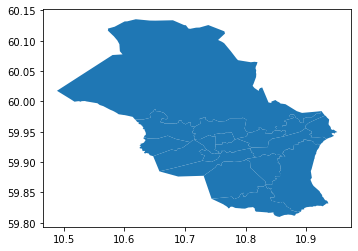

In [12]:
df_geo = gpd.read_file('./data/neighbourhoods.geojson')
df_geo.plot();

In [13]:
df = pd.read_csv('./data/listings.csv', parse_dates=['last_review'])
df.head(3)

C:\Anaconda3\envs\dand\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42932,https://www.airbnb.com/rooms/42932,20191129104559,2019-11-29,"Charming apartment, Oslo Center, Ro",NaN,"Charming apartment, Oslo Center, Royal House T...","Charming apartment, Oslo Center, Royal House T...",none,(URL HIDDEN),NaN,NaN,The whole flat,I will be on phone or mail 24/7 during you sta...,Comment sense :),NaN,NaN,https://a0.muscache.com/im/pictures/e84133b1-2...,NaN,187463,https://www.airbnb.com/users/show/187463,Cecilie,2010-08-01,"Oslo, Oslo, Norway","Fashion clothing designer,Concept developer 47...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/187463/profil...,https://a0.muscache.com/im/users/187463/profil...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Oslo, Oslo, Norway",Frogner,Frogner,NaN,Oslo,Oslo,0253,Oslo,"Oslo, Norway",NO,Norway,59.91234,10.72384,...,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",NaN,"$2,000.00","$10,000.00","$25,000.00",$0.00,$300.00,3,$0.00,3,300,3,3,300,300,3.0,300.0,6 months ago,t,28,55,85,360,2019-11-29,37,7,2013-09-02,2019-06-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,0.49
1,43198,https://www.airbnb.com/rooms/43198,20191129104559,2019-11-29,Lovely low budgetroom in nice area!,"This is a small, bright room, facing our quiet...","A beautiful intimate bedroom, in an appartment...","This is a small, bright room, facing our quiet...",none,Only five minutes walk from the castle and the...,I would prefer one person but can accept two. ...,"Walking Oslo is quiet possible, really lovely,...",Shared bathroom and well equipped kitchen. Wi-fi.,You will have full privacy.,"This is our home, and we will respect your pri...",NaN,NaN,https://a0.muscache.com/im/pictures/73523d9a-a...,NaN,4011871,https://www.airbnb.com/users/show/4011871,Mona Johanne,2012-10-30,"Oslo, Oslo, Norway","We offer a beautiful, spacious room with high ...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/4011871/profi...,https://a0.muscache.com/im/users/4011871/profi...,NaN,2.0,2.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,f,"Oslo, Oslo, Norway",Frogner,Frogner,NaN,Oslo,Oslo,0263,Oslo,"Oslo, Norway",NO,Norway,59.91839,10.71457,...,1.0,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Cat...",NaN,$385.00,NaN,NaN,$0.00,$101.00,1,$101.00,2,4,2,2,4,4,2.0,4.0,4 months ago,t,0,0,0,0,2019-11-29,3

In [14]:
df_neigh = pd.read_csv('./data/neighbourhoods.csv')
df_neigh.head(3)

,neighbourhood_group,neighbourhood
0,NaN,Alna
1,NaN,Bjerke
2,NaN,Frogner


In [15]:
df_cal = pd.read_csv('./data/calendar.csv.gz', compression='gzip')
df_cal.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13612597,2019-11-29,f,$505.00,$505.00,1,6
1,13612597,2019-11-30,f,$505.00,$505.00,1,6
2,13612597,2019-12-01,f,$505.00,$505.00,1,6


The data have been successfully read into dataframes.

### Assess data <a class="anchor" id="assess-data"></a>

First we look at `df_geo`

In [16]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
neighbourhood          17 non-null object
neighbourhood_group    0 non-null object
geometry               17 non-null geometry
dtypes: geometry(1), object(2)
memory usage: 536.0+ bytes


We can see that `df_geo` is a geopandas 'GeoDataFrame'.

There are 17 entries two columns with data, 'neighbourhood' and 'geometry'. Column 'neighbourhood_group' only contains nulls.

In [17]:
df_geo

,neighbourhood,neighbourhood_group,geometry
0,Bjerke,None,"MULTIPOLYGON (((10.78661 59.93823, 10.78860 59..."
1,Frogner,None,"MULTIPOLYGON (((10.64777 59.90941, 10.67810 59..."
2,Sagene,None,"MULTIPOLYGON (((10.74832 59.94551, 10.75929 59..."
3,Vestre Aker,None,"MULTIPOLYGON (((10.61789 59.96986, 10.62984 59..."
4,Sentrum,None,"MULTIPOLYGON (((10.72282 59.91716, 10.72855 59..."
5,Grorud,None,"MULTIPOLYGON (((10.84833 59.95676, 10.85042 59..."
6,St. Hanshaugen,None,"MULTIPOLYGON (((10.71574 59.93626, 10.72009 59..."
7,Nordre Aker,None,"MULTIPOLYGON (((10.71207 59.94769, 10.71236 59..."
8,Grünerløkka,None,"MULTIPOLYGON (((10.74873 59.92033, 10.75124 59..."
9,Gamle Oslo,None,"MULTIPOLYGON (((10.65808 59.88441, 10.68243 59..."


The 'geometry' column contains multipolygon coordinates, ie. the coordinates necessary to draw the shape of each neighbourhood and form some sort of map of Oslo.

Next we look at `df`, which is our "main" DataFrame containing listings data

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8604 entries, 0 to 8603
Columns: 106 entries, id to reviews_per_month
dtypes: datetime64[ns](1), float64(25), int64(21), object(59)
memory usage: 7.0+ MB


There re 8,315 entries and 106 columns.

One column has data type 'datetime', and there are 25 float, 21 int and 59 string.

Let's look at the one with **date_type**:

In [19]:
df.describe(include='datetime')

,last_review
count,6829
unique,1222
top,2019-11-24 00:00:00
freq,143
first,2013-05-18 00:00:00
last,2019-11-29 00:00:00


This gives a indication of time range: May 2013 - November 2019

We look at the description of **numeric** variables. As we know, there are many; 25 float and 21 integer.

In [20]:
df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,8.604000e+03,8.604000e+03,0.0,0.0,0.0,8.604000e+03,0.0,8597.000000,8597.000000,0.0,8604.000000,8604.000000,8604.000000,8601.000000,8599.000000,8590.000000,50.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,8604.000000,6653.000000,6647.000000,6650.000000,6637.000000,6645.000000,6635.000000,6634.000000,0.0,0.0,8604.000000,8604.000000,8604.000000,8604.000000,6829.000000
mean,2.086794e+07,2.019113e+13,NaN,NaN,NaN,7.021649e+07,NaN,1.715947,1.715947,NaN,59.921652,10.756251,3.259995,1.094873,1.413885,1.904424,462.820000,1.459205,4.265690,608.380637,4.228266,4.601232,618.064389,620.837169,4.375732,619.770456,4.892724,11.507322,18.826709,58.849489,17.740586,6.042655,95.662408,9.749812,9.522256,9.769776,9.843642,9.697212,9.596473,NaN,NaN,1.643422,1.231288,0.354021,0.045560,1.063601
std,1.079553e+07,0.000000e+00,NaN,NaN,NaN,7.127228e+07,NaN,2.733305,2.733305,NaN,0.018291,0.038040,1.660944,0.313659,0.880904,1.334956,365.170672,0.905938,18.370528,555.254874,18.358037,21.225646,554.791703,554.485816,18.947351,554.154858,8.896253,18.920865,29.939108,105.173598,41.280674,13.862627,6.419184,0.663404,0.874877,0.646106,0.563882,0.597792,0.722739,NaN,NaN,2.674743,2.491686,1.036790,0.566833,1.534374
min,4.293200e+04,2.019113e+13,NaN,NaN,NaN,2.755400e+04,NaN,0.000000,0.000000,NaN,59.818150,10.623810,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.290353e+07,2.019113e+13,NaN,NaN,NaN,1.735203e+07,NaN,1.000000,1.000000,NaN,59.913938,10.734578,2.000000,1.000000,1.000000,1.000000,79.500000,1.000000,2.000000,20.000000,2.000000,2.000000,21.000000,21.000000,2.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.170000
50%,1.981846e+07,2.019113e+13,NaN,NaN,NaN,4.498351e+07,NaN,1.000000,1.000000,NaN,59.922875,10.760690,3.000000,1.000000,1.000000,2.000000,538.000000,1.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.470000
75%,2.985227e+07,2.019113e+13,NaN,NaN,NaN,9.627341e+07,NaN,2.000000,2.000000,NaN,59.930170,10.774213,4.000000,1.000000,2.000000,2.000000,686.500000,2.000000,3.000000,1125.000000,3.000000,4.000000,1125.000000,1125.000000,3.100000,1125.000000,6.000000,19.000000,29.000000,70.000000,16.000000,5.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,1.000000,1.000000,0.000000,0.000000,1.250000
max,4.044807e+07,2.019113e+13,NaN,NaN,NaN,3.125356e+08,NaN,41.000000,41.000000,NaN,60.036680,10.944150,16.000000,5.500000,9.000000,16.000

Some notes on min/max ranges (inclusive): 
- 'host_listings_count' ranges from 0 to 41. (mean: 1.73)
- 'accommodates' from 1 to 16. (mean: 3.25)
- 'bathrooms' from 0 to 5.5. (mean: 1.09)
- 'bedrooms' from 0 to 9. (mean: 1.41)
- 'beds' from 0 to 16. (mean: 1.89)
- 'square_feet' from 0 to 1238 (mean: 463)
- 'minimum_nights' from 1 to 1000 (mean: 4.25) <- Possible outlier on the max value 
- 'number_of_reviews' from 0 to 809 (mean: 18) <- Next column 'number_of_reviews_ltm'
- 'review_scores_rating' from 20 to 100 (mean: 95.7)
- 'review_scores_accuracy' from 2 to 10 (mean: 9.75)
- 'review_scores_cleanliness' from 2 to 10 (mean: 9.52)
- 'review_scores_checkin' from 2 to 10 (mean: 9.77)
- 'review_scores_communication' from 2 to 10 (mean: 9.85)
- 'review_scores_location' from 2 to 10 (mean: 9.71)
- 'review_scores_value' from 2 to 10 (mean: 9.60)

We note that 'review_scores_rating' only has values for 6653 out of 8604 listings. Pretty much the same is the case for the other review scores subcategory ratings.

We also note there are seven columns having nothing but nan values.

We take a closer look at the review scores related variables.

In [21]:
df[df.review_scores_rating.isna() == True].head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
23,331352,https://www.airbnb.com/rooms/331352,20191129104559,2019-11-29,Central Oslo,NaN,"Bohemic, but quiet, nice and clean. Situated b...","Bohemic, but quiet, nice and clean. Situated b...",none,Most vibrant neighborhood in Oslo.,NaN,"Very easy access to all public transport, 10 m...","Guest room, kitchen for quick meals",NaN,"No parties in-house please, the citylife outsi...",NaN,NaN,https://a0.muscache.com/im/pictures/6849056/64...,NaN,1689500,https://www.airbnb.com/users/show/1689500,Trond,2012-02-02,"Oslo, Oslo, Norway",I am a social guy from Norway working in the m...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1689500/profi...,https://a0.muscache.com/im/users/1689500/profi...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Oslo, Oslo, Norway",Grünerløkka,St. Hanshaugen,NaN,Oslo,Oslo,0181,Oslo,"Oslo, Norway",NO,Norway,59.91484,10.75308,...,NaN,Real Bed,"{""Fire extinguisher"",Essentials}",NaN,"$1,211.00","$3,534.00",NaN,NaN,NaN,2,$505.00,5,10,5,5,10,10,5.0,10.0,46 months ago,t,0,0,0,0,2019-11-29,0,0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN
29,422607,https://www.airbnb.com/rooms/422607,20191129104559,2019-11-29,Lovely Apt w garden in city centre,Beautiful 1bdr apt w private garden located in...,The whole apt has been newly renovated last ye...,Beautiful 1bdr apt w private garden located in...,none,Safe great neighbourhood with everything you n...,Always remember to lock garden doors and all w...,"Buses that take you wherever you need to go, t...","No access to big closet, but you will have spa...",I am avialable throughout your stay for any qu...,"No loud parties, but you can play music and fe...",NaN,NaN,https://a0.muscache.com/im/pictures/41370371/7...,NaN,802516,https://www.airbnb.com/users/show/802516,Nadia,2011-07-10,"Oslo, Oslo, Norway",-,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/802516/profil...,https://a0.muscache.com/im/users/802516/profil...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Oslo, Oslo, Norway",Sagene,Sagene,NaN,Oslo,Oslo,0458,Oslo,"Oslo, Norway",NO,Norway,59.93014,10.75243,...,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Wheelchair acces...",NaN,$596.00,"$4,500.00",NaN,"$2,000.00",$300.00,1,$0.00,3,30,3,3,30,30,3.0,30.0,31 months ago,t,0,0,0,0,2019-11-29,0,0,NaN,NaT,NaN,NaN,NaN,NaN,Na

So whenever 'review_scores_rating' is missing, the other review scores related variables are missing as well. The missing data should be dropped, given that these are key variables. Also, it could indicate that the listing was not rented, and hence, the price would be hypothetical.

Let's have a closer look at 'minimum_nights' as well:

In [22]:
df.minimum_nights.value_counts()

2       2913
1       2075
3       1510
4        600
5        537
7        361
6        169
10        85
30        83
14        75
15        22
8         21
20        19
21        17
60        13
25        12
90         9
12         7
13         7
50         7
100        7
28         6
16         5
365        4
31         4
27         4
9          3
180        3
19         2
200        2
23         2
500        2
56         1
40         1
80         1
32         1
1000       1
111        1
61         1
322        1
41         1
89         1
18         1
45         1
150        1
110        1
279        1
44         1
29         1
407        1
Name: minimum_nights, dtype: int64

Ok, most are less than a week. They high values of 500 and 1000 are rare. This variable could be made categorical with ranges.

Now, let us look at the columns in `df` of type string:

In [23]:
df.describe(include='object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,property_type,room_type,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,calendar_updated,has_availability,calendar_last_scraped,first_review,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,8604,8604,8584,8324,5162,8431,8604,4911,2456,5430,4113,4325,5126,8604,8604,8597,8597,8565,4220,3759,3759,8597,8597,8597,6006,8604,8597,8597,8604,8341,8604,8556,8515,8283,8575,8604,8604,8604,8604,8604,8604,8604,8604,8604,856,547,4472,5955,8604,8604,8604,8604,6829,8604,8604,8604,8604,8604,8604
unique,8604,1,8327,8158,4975,8332,1,4633,2321,5141,3761,4033,4678,8483,7549,2881,2468,287,3526,4,42,2,7522,7522,29,201,2,2,80,14,17,62,15,579,4,65,1,1,2,22,4,5,8393,291,296,213,188,296,184,81,1,1,1762,1,2,1,4,2,2
top,https://www.airbnb.com/rooms/13719975,2019-11-29,Urban Apartments Grünerløkka Spacious Studio,Modern room with double bed close to Majorstue...,Urban Apartments ligger i byens hippeste bydel...,Modern room with double bed close to Majorstue...,none,The villa is located in a quiet villa neighbor...,The listing is run as a small self service hos...,Ruter is the name of the public transport prov...,The whole apartment,Contact us through Airbnb,- No shoes inside,https://a0.muscache.com/im/pictures/effa7ae3-f...,https://www.airbnb.com/users/show/233933220,Anders,2019-01-02,"Oslo, Oslo, Norway",Urban Apartments er et selskap som tilbyr kort...,within an hour,100%,f,https://a0.muscache.com/im/pictures/user/f244d...,https://a0.muscache.com/im/pictures/user/f244d...,Grünerløkka,"['email', 'phone']",t,f,"Oslo, Oslo, Norway",Grünerløkka,Grünerløkka,Oslo,Oslo,0190,Oslo,"Oslo, Norway",NO,Norway,t,Apartment,Entire home/apt,Real Bed,{},$596.00,"$5,000.00","$15,000.00",$0.00,$500.00,$0.00,2 months ago,t,2019-11-29,2018-07-01,f,f,f,flexible,f,f
freq,1,8604,10,7,17,7,8604,14,17,36,28,23,33,8,33,60,33,7095,33,2172,2983,7516,33,33,1416,1126,8576,5397,4412,1967,1909,4464,8491,135,8569,4509,8604,8604,6386,6873,6885,8457,16,446,63,36,2629,642,4691,489,8604,8604,37,8604,5768,8604,3997,8567,8559


Observations:
- 'last_scraped' should have been datetime, but we will drop it later, as it only has 1 unique value '2019-11-29'.
- 'host_since' should have been datetime - could be converted to a numerical 'host_since_year'
- 'neighbourhood_cleansed' sounds like it could be better to use than 'neighbourhood'
- 'host_is_super_host', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification' should be boolean, indicated by 't' and 'f' strings.
- Price columns should be numerical: 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.
- Columns 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type' should be categorical type.

Property type has 22 different categories.

In [24]:
df.property_type.value_counts()

Apartment             6873
Condominium            853
House                  411
Loft                   165
Townhouse              148
Serviced apartment      39
Villa                   28
Guest suite             25
Guesthouse              12
Boat                    10
Other                    9
Cabin                    7
Camper/RV                5
Bed and breakfast        5
Tiny house               4
Tent                     3
Farm stay                2
Chalet                   1
Hostel                   1
Vacation home            1
Houseboat                1
Dome house               1
Name: property_type, dtype: int64

The following can be called 'House': 
- 'Townhouse', 'Villa', 'Guesthouse', 'Cabin', 'Tiny house', 'Chalet', 'Vacation home', 'Farm stay', 'Dome house'

And the following can be called 'Apartment':
- 'Condominium', 'Loft', 'Serviced Apartment', 'Guest suite', 'Bed and breakfast'

The rest can be 'Other':
- 'Boat', 'Camper/RV', 'Tent', 'Houseboat', 'Hostel'

Now, let's look if there are other columns in `df` that we do not need, or wouldn't know how to use in a model:

In [25]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,42932,https://www.airbnb.com/rooms/42932,20191129104559,2019-11-29,"Charming apartment, Oslo Center, Ro",NaN,"Charming apartment, Oslo Center, Royal House T...","Charming apartment, Oslo Center, Royal House T...",none,(URL HIDDEN),NaN,NaN,The whole flat,I will be on phone or mail 24/7 during you sta...,Comment sense :),NaN,NaN,https://a0.muscache.com/im/pictures/e84133b1-2...,NaN,187463,https://www.airbnb.com/users/show/187463,Cecilie,2010-08-01,"Oslo, Oslo, Norway","Fashion clothing designer,Concept developer 47...",within an hour,100%,NaN,f,https://a0.muscache.com/im/users/187463/profil...,https://a0.muscache.com/im/users/187463/profil...,NaN,1.0,1.0,"['email', 'phone', 'reviews']",t,f,"Oslo, Oslo, Norway",Frogner,Frogner,NaN,Oslo,Oslo,0253,Oslo,"Oslo, Norway",NO,Norway,59.91234,10.72384,...,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free str...",NaN,"$2,000.00","$10,000.00","$25,000.00",$0.00,$300.00,3,$0.00,3,300,3,3,300,300,3.0,300.0,6 months ago,t,28,55,85,360,2019-11-29,37,7,2013-09-02,2019-06-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,0.49
1,43198,https://www.airbnb.com/rooms/43198,20191129104559,2019-11-29,Lovely low budgetroom in nice area!,"This is a small, bright room, facing our quiet...","A beautiful intimate bedroom, in an appartment...","This is a small, bright room, facing our quiet...",none,Only five minutes walk from the castle and the...,I would prefer one person but can accept two. ...,"Walking Oslo is quiet possible, really lovely,...",Shared bathroom and well equipped kitchen. Wi-fi.,You will have full privacy.,"This is our home, and we will respect your pri...",NaN,NaN,https://a0.muscache.com/im/pictures/73523d9a-a...,NaN,4011871,https://www.airbnb.com/users/show/4011871,Mona Johanne,2012-10-30,"Oslo, Oslo, Norway","We offer a beautiful, spacious room with high ...",within an hour,100%,NaN,t,https://a0.muscache.com/im/users/4011871/profi...,https://a0.muscache.com/im/users/4011871/profi...,NaN,2.0,2.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,f,"Oslo, Oslo, Norway",Frogner,Frogner,NaN,Oslo,Oslo,0263,Oslo,"Oslo, Norway",NO,Norway,59.91839,10.71457,...,1.0,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Cat...",NaN,$385.00,NaN,NaN,$0.00,$101.00,1,$101.00,2,4,2,2,4,4,2.0,4.0,4 months ago,t,0,0,0,0,2019-11-29,3

In [26]:
# There are quite a few that we do not need or wouldn't know how to use in a model

cols_not_needed = ['id', 'listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 
                   'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 
                   'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                   'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 
                   'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market', 'smart_location', 'latitude',
                   'longitude', 'accommodates', 'bedrooms', 'beds', 'bed_type', 'weekly_price', 'monthly_price',
                   'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                   'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 
                   'availability_90', 'availability_365', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                   'host_since_year']

# In addition we notice there are two more columns that should be datetype. Perhaps combined to a number of days delta.
dt_cols = ['first_review', 'last_review']

In [27]:
df_neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
neighbourhood_group    0 non-null float64
neighbourhood          17 non-null object
dtypes: float64(1), object(1)
memory usage: 400.0+ bytes


Like with `df_geo`, `df_neigh` has 17 entries, and it looks similar, except for the lack of coordinates.

Let's see if the neighbourhood list in `df_neigh` matches with `df_geo`:

In [28]:
a = df_geo.neighbourhood.sort_values().reset_index()['neighbourhood']
b = df_neigh.neighbourhood.sort_values().reset_index()['neighbourhood']
a.equals(b)

True

It does.

Lastly, we look at 'df_cal'

In [29]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140460 entries, 0 to 3140459
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    int64
maximum_nights    int64
dtypes: int64(3), object(4)
memory usage: 167.7+ MB


There are 3.1 million entries and 7 columns. Let's look at the top rows.

In [30]:
df_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13612597,2019-11-29,f,$505.00,$505.00,1,6
1,13612597,2019-11-30,f,$505.00,$505.00,1,6
2,13612597,2019-12-01,f,$505.00,$505.00,1,6
3,13612597,2019-12-02,f,$505.00,$505.00,1,6
4,13612597,2019-12-03,f,$505.00,$505.00,1,6


Ok, so here we can see per calendar 'date' whether a listing was 'available', price, minimum and maximum nights.

Observations:
- 'date' should be of type 'datetime'
- 'available' should be of type boolean.
- 'price' and 'adjusted_price' should be of type float.

In [31]:
df_cal.notna().sum()

listing_id        3140460
date              3140460
available         3140460
price             3139361
adjusted_price    3139361
minimum_nights    3140460
maximum_nights    3140460
dtype: int64

We do not have many missing values, just a few for 'price' and 'adjusted price'.

**Assessment Conclusions** 

1) The data were overall tidy.

2) Some dirtiness observed though:

MISC

- Columns with no variation in values
- Columns with nan values only (or close to it)
- All the columns in the list 'cols_not_needed'

NON-LOGICAL DATA TYPES

- String columns `df`: 'first_review', 'last_review' (list: dt_cols) should be datetime and possibly dropped if we want to look at the numeric delta (number of days)
- String columns `df`: 'last_scraped' should have been datetime, but we will drop it later, as it only has 1 unique value '2019-11-29'.
- String columns `df`: 'host_since' should have been datetime - should perhaps be converted to a numerical 'host_since_year'
- String columns `df`: 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification' should be boolean, indicated by 't' and 'f' strings, should be 0/1.
- String columns `df`: Price columns should be numerical: 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.
- String columns `df`: Columns 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type', 'minimum_nights' should be categorical type.
- String columns `df`: Whenever 'review_scores_rating' is missing, the other review scores related variables are missing as well. The missing data should be dropped, given that these are key variables. Also, it could indicate that the listing was not rented, and hence, the price would be hypothetical.
- String columns `df_cal`: 'date' should be of type 'datetime'
- String columns `df_cal`: 'available' should be of type boolean.
- String columns `df_cal`: 'price' and 'adjusted_price' should be of type float.


OUTLIERS
- In `df` consider dropping rows where 'price' divided by 'guests_included' is under 50 or over 3000.

## Data Preparation <a class="anchor" id="data-preparation"></a>

### Data cleaning approach <a class="anchor" id="data-cleaning"></a>

We will use a 3 step process for data cleaning:
1. Define
2. Clean
3. Test

### Clean data <a class="anchor" id="clean-data"></a>

We will require some data cleaning based on the assessment:

REMOVE COLUMNS
- Remove columns with no variation in values - `df`, `df_neigh`
- Remove columns with 99% or more nan values - `df`, `df_neigh`
- Remove all the columns in the list 'cols_not_needed'

FIX NON-LOGICAL DATA TYPES
- In `df` convert 'first_review' and 'last_review' (list: dt_cols) to type 'datetime', extract the delta in new column 'review_range_days' and drop the original columns
- In `df` convert 'host_since' to type 'datetime' and then to integer type in a new column 'host_since_year'. Drop 'host_since'.
- In `df` convert (t/f) columns to type boolean: 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'.
- In `df` convert Price columns to type 'float': 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.
- In `df` convert 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type', 'minimum_nights' to type 'categorical'.
- In `df` drop all entries where 'review_scores_rating' is missing.
- In `df_cal` convert 'date' to type 'datetime'.
- In `df_cal` convert 'available' to type boolean.
- In `df_cal` convert 'price' and 'adjusted_price' to type 'float'.


REMOVE OUTLIERS
- In `df` drop rows where 'price' divided by 'guests_included' is under 50 or over 3000.

To address the first two items
    1. Defined

- Remove columns with no variation in values - in `df`, `df_neigh`
- Remove columns with 99% or more nan values - `df`, `df_neigh`

we use a custom function `df_cleaning()`

In [32]:
def df_cleaning(df, nan_threshold):
    '''
    The function will take a pandas dataframe, remove some of its columns 
    based on below listed criteria and return a (cleaner) dataframe.
    
    To be removed
    - Columns with no variation in values
    - Columns with more nan values than the "nan_threshold" input
    
    INPUT
    
    df - Pandas DataFrame
    
    nan_treshold - the minimum ratio of nan values before column gets removed. 
    
                   Example: A nan_threshold of 0.9 means that columns having more than 90 percent
                            nan values will be removed
    
    OUTPUT
    
    cleaned_df - Pandas DataFrame where columns have been removed based on above listed criteria
    
    '''
    # list of colomn names for columns with no variability among the data points
    non_var_cols = list(df.loc[:, df.nunique() <= 1].nunique().index)
    
    # list of colomn names for columns with nan_threshold surpassed
    mostly_nan_cols = list(df.loc[:, df.isna().sum() > df.shape[0]*nan_threshold].nunique().index)
    
    # combine the two lists in one list, ensuring no duplicate column names
    cols_to_drop = list(set(mostly_nan_cols + non_var_cols))
    
    # drop the columns based on the 'cols_to_drop' list
    cleaned_df = df.drop(columns=cols_to_drop)
    
    print("{} columns removed:".format(len(cols_to_drop)))
    print(cols_to_drop)
    
    return cleaned_df

    2. Clean 

In [33]:
df = df_cleaning(df, 0.99)

17 columns removed:
['neighbourhood_group_cleansed', 'scrape_id', 'square_feet', 'jurisdiction_names', 'license', 'country_code', 'country', 'calendar_last_scraped', 'medium_url', 'has_availability', 'experiences_offered', 'xl_picture_url', 'host_acceptance_rate', 'thumbnail_url', 'requires_license', 'last_scraped', 'is_business_travel_ready']


In [34]:
df_neigh = df_cleaning(df_neigh, 0.99)

1 columns removed:
['neighbourhood_group']


In [35]:
df_geo = df_cleaning(df_geo, 0.99)

1 columns removed:
['neighbourhood_group']


    3. Test

In [36]:
print(df.shape, df_neigh.shape, df_geo.shape)

(8604, 89) (17, 1) (17, 2)


The columns have indeed been removed.

    1. Define
- Remove all the columns in the list 'cols_not_needed'

    2. Clean

In [37]:
cols_not_needed = ['id', 'listing_url', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 
                   'transit', 'access', 'interaction', 'house_rules', 'picture_url', 'host_id', 'host_url', 
                   'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 
                   'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 
                   'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market', 'smart_location', 'latitude',
                   'longitude', 'accommodates', 'bedrooms', 'beds', 'bed_type', 'weekly_price', 'monthly_price',
                   'extra_people', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 
                   'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30', 'availability_60', 
                   'availability_90', 'availability_365', 'calculated_host_listings_count_entire_homes',
                   'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']
print(len(cols_not_needed))

55


In [38]:
df.drop(columns=cols_not_needed, inplace=True)

    3. Test

In [39]:
df.shape

(8604, 34)

Good. 55 columns were dropped.

    1. Define

- In `df` convert 'first_review' and 'last_review' (list: dt_cols) to type 'datetime', extract the delta in new column 'review_range_days' and drop the original columns

    2. Clean

In [40]:
for col in dt_cols:
    df[col] = pd.to_datetime(df[col]).dt.year


df['review_range_days'] = df['last_review'] - df['first_review']

In [41]:
df.review_range_days.value_counts()

0.0    3414
1.0    1572
2.0     827
3.0     571
4.0     252
5.0     133
6.0      35
7.0      19
8.0       6
Name: review_range_days, dtype: int64

    3. Test

In [42]:
df.columns

Index(['host_since', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'is_location_exact', 'property_type',
       'room_type', 'bathrooms', 'amenities', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'minimum_nights',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count', 'reviews_per_month',
       'review_range_days'],
      dtype='object')

Good.

    1. Define

- In `df` convert 'host_since' to type 'datetime' and then to numeric type in a new column 'host_since_year'. Drop 'host_since'.

    2. Clean

In [43]:
df['host_since_year'] = pd.to_datetime(df['host_since']).dt.year

In [44]:
df.drop(columns=['host_since'], inplace=True)

    3. Test

In [45]:
df.shape

(8604, 35)

In [46]:
df.host_since_year.dtypes

dtype('float64')

In [47]:
df.host_since_year.value_counts()

2016.0    1975
2015.0    1813
2014.0    1503
2017.0     902
2013.0     797
2018.0     550
2019.0     474
2012.0     396
2011.0     148
2010.0      37
2009.0       2
Name: host_since_year, dtype: int64

Numeric column 'host_since_year' successfully created.

    1. Define
- In `df` convert (t/f) columns to type boolean: 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification'.

    2. Clean

In [48]:
tf_cols = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact', 
           'instant_bookable', 'require_guest_profile_picture', 'require_guest_phone_verification']

binary_mapping = {'f': 0, 't': 1}

df[tf_cols] = df[tf_cols].apply(lambda x: x.map(binary_mapping))

    3. Test

In [49]:
df[tf_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0.0,1.0,0.0,0,1,0,0
1,1.0,1.0,0.0,1,1,0,0
2,0.0,1.0,0.0,1,0,0,0
3,0.0,1.0,1.0,1,0,0,0
4,0.0,1.0,1.0,0,0,0,0


In [50]:
df[tf_cols].nunique()

host_is_superhost                   2
host_has_profile_pic                2
host_identity_verified              2
is_location_exact                   2
instant_bookable                    2
require_guest_profile_picture       2
require_guest_phone_verification    2
dtype: int64

Looks good.

    1. Define
- In `df` convert Price columns to type 'float': 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people'.

    2. Clean

In [52]:
price_cols = ['price', 'cleaning_fee']

for col in price_cols:
    df[col] = df[col].str.replace(',', '')
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].astype(float)


    3. Test

In [53]:
df[price_cols]

,price,cleaning_fee
0,2000.0,300.0
1,385.0,101.0
2,1009.0,550.0
3,504.0,252.0
4,1917.0,NaN
5,789.0,600.0
6,761.0,303.0
7,1348.0,367.0
8,1000.0,250.0
9,660.0,303.0


This looks fine.

    1. Define
- In `df` convert 'cancellation_policy', 'host_response_time', 'property_type', 'room_type', 'bed_type' and 'minimum_nights' to type 'categorical'.

For 'property_type' the following can be called 'House': 
- 'Townhouse', 'Villa', 'Guesthouse', 'Cabin', 'Tiny house', 'Chalet', 'Vacation home', 'Farm stay', 'Dome house'

And the following can be called 'Apartment':
- 'Condominium', 'Loft', 'Serviced Apartment', 'Guest suite', 'Bed and breakfast'

The rest can be 'Other':
- 'Boat', 'Camper/RV', 'Tent', 'Houseboat', 'Hostel'

    2. Clean

In [54]:
cat_type = pd.api.types.CategoricalDtype(['super_strict_30', 'strict_14_with_grace_period', 'moderate', 'flexible'])

df['cancellation_policy'] = df['cancellation_policy'].astype(cat_type)

In [55]:
cat_type = pd.api.types.CategoricalDtype(['not specified', 'a few days or more', 'within a day', 'within a few hours', 
                                          'within an hour'])

df['host_response_time'] = df['host_response_time'].fillna('not specified').astype(cat_type)

In [56]:
house_cols = ['Townhouse', 'Villa', 'Guesthouse', 'Cabin', 'Tiny house', 'Chalet', 'Vacation home', 
              'Farm stay', 'Dome house']

apt_cols = ['Condominium', 'Loft', 'Serviced apartment', 'Guest suite', 'Bed and breakfast']

other_cols = ['Boat', 'Camper/RV', 'Tent', 'Houseboat', 'Hostel']


for col in house_cols:
    df.property_type = df.property_type.replace({col: 'House'})
    
for col in apt_cols:
    df.property_type = df.property_type.replace({col: 'Apartment'})
    
for col in other_cols:
    df.property_type = df.property_type.replace({col: 'Other'})

df.property_type = df.property_type.astype('category')

In [58]:
df.room_type = df.room_type.astype('category')

In [59]:
vals = list(df.minimum_nights.value_counts().index.sort_values(ascending = False))

for val in vals:
    if val > 30:
        df.minimum_nights = df.minimum_nights.replace({val: '31 days+'})
    elif val > 14:
        df.minimum_nights = df.minimum_nights.replace({val: '15-30 days'})
    elif val > 7:
        df.minimum_nights = df.minimum_nights.replace({val: '8-14 days'})
    elif val > 6:
        df.minimum_nights = df.minimum_nights.replace({val: '7 days'})
    elif val > 5:
        df.minimum_nights = df.minimum_nights.replace({val: '6 days'})
    elif val > 4:
        df.minimum_nights = df.minimum_nights.replace({val: '5 days'})
    elif val > 3:
        df.minimum_nights = df.minimum_nights.replace({val: '4 days'})
    elif val > 2:
        df.minimum_nights = df.minimum_nights.replace({val: '3 days'})
    elif val > 1:
        df.minimum_nights = df.minimum_nights.replace({val: '2 days'})
    elif val > 0:
        df.minimum_nights = df.minimum_nights.replace({val: '1 day'})
    else:
        assert val > 0

In [60]:
cat_type = pd.api.types.CategoricalDtype(['1 day', '2 days', '3 days', '4 days', '5 days', '6 days', '7 days', '8-14 days','15-30 days', '31 days+'])

df['minimum_nights'] = df['minimum_nights'].astype(cat_type)

    3. Test

In [61]:
df.cancellation_policy.value_counts()

flexible                       3997
moderate                       2620
strict_14_with_grace_period    1983
super_strict_30                   4
Name: cancellation_policy, dtype: int64

In [62]:
df.host_response_time.value_counts()

not specified         4845
within an hour        2172
within a day           743
within a few hours     732
a few days or more     112
Name: host_response_time, dtype: int64

In [63]:
df.property_type.value_counts()

Apartment    7960
House         615
Other          29
Name: property_type, dtype: int64

In [64]:
df.room_type.value_counts()

Entire home/apt    6885
Private room       1607
Shared room         100
Hotel room           12
Name: room_type, dtype: int64

In [66]:
df[['cancellation_policy', 'host_response_time', 'property_type', 'room_type']].dtypes

cancellation_policy    category
host_response_time     category
property_type          category
room_type              category
dtype: object

The tests all look good.

    1. Define

- In `df` drop all entries where 'review_scores_rating' is missing.

    2. Clean

In [67]:
df = df.dropna(subset=['review_scores_rating'])

In [68]:
df = df.dropna(subset=['review_scores_accuracy'])

In [69]:
df = df.dropna(subset=['review_scores_checkin'])

In [70]:
df = df.dropna(subset=['review_scores_communication'])

In [71]:
df = df.dropna(subset=['review_scores_location'])

In [72]:
df = df.dropna(subset=['review_scores_value'])

    3. Test

In [73]:
df.dropna(subset=['review_scores_rating']).shape

(6633, 35)

This looks fine.

    1. Define
- In `df` drop rows where 'price' divided by 'guests_included' is under 50 or over 3000.

    2. Clean

In [76]:
df = df[df.price/df.guests_included <= 3000]

In [77]:
df = df[df.price/df.guests_included >= 50]

    3. Test

In [78]:
df[df.price/df.guests_included > 3000]

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,bathrooms,amenities,price,security_deposit,cleaning_fee,guests_included,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,review_range_days,host_since_year


In [79]:
df[df.price/df.guests_included < 50]

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,bathrooms,amenities,price,security_deposit,cleaning_fee,guests_included,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,review_range_days,host_since_year


Fine.

    1. Define
- In `df_cal` convert 'date' to type 'datetime'.

    2. Clean

In [80]:
df_cal['date'] = pd.to_datetime(df_cal['date'])

    3. Test

In [81]:
df_cal.date.head(1)

0   2019-11-29
Name: date, dtype: datetime64[ns]

This looks fine.

    1. Define
- In `df_cal` convert 'available' to type boolean.

    2. Clean

In [82]:
binary_mapping = {'f': 0, 't': 1}

df_cal[['available']] = df_cal[['available']].apply(lambda x: x.map(binary_mapping))

    3. Test

In [83]:
df_cal.available.value_counts()

0    2627213
1     513247
Name: available, dtype: int64

This looks fine too.

    1. Define
- In `df_cal` convert 'price' and 'adjusted_price' to type 'float'.

    2. Clean

In [84]:
price_cols = ['price', 'adjusted_price']

for col in price_cols:
    df_cal[col] = df_cal[col].str.replace(',', '')
    df_cal[col] = df_cal[col].str.replace('$', '')
    df_cal[col] = df_cal[col].astype(float)

    3. Test

In [85]:
df_cal.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13612597,2019-11-29,0,505.0,505.0,1,6
1,13612597,2019-11-30,0,505.0,505.0,1,6
2,13612597,2019-12-01,0,505.0,505.0,1,6


Great.

That concludes our cleaning.

## Data Understanding Part 2 <a class="anchor" id="data-understanding2"></a>

Before the cleaning the data we assessed it, which included some initial exploration.

Now we shall explore the data in more depth.

### Univariate exploration <a class="anchor" id="univariate-exploration"></a>

In [87]:
df.describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,bathrooms,price,cleaning_fee,guests_included,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,review_range_days,host_since_year
count,6579.000000,6579.000000,6579.000000,6586.000000,6586.000000,6586.000000,4960.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6579.000000
mean,0.159447,0.998936,0.396109,0.747039,1.084573,828.573034,314.202621,1.525053,23.029912,7.837686,2017.247647,2018.299727,95.677801,9.751442,9.523231,9.770878,9.844974,9.698451,9.600516,0.334346,0.004555,0.005314,1.682508,1.093480,1.052080,2015.243046
std,0.366120,0.032604,0.489125,0.434742,0.289501,498.022444,274.262712,0.945144,45.822955,15.335882,1.505701,1.071785,6.320884,0.653489,0.869717,0.638817,0.556144,0.588052,0.712824,0.471797,0.067343,0.072711,2.722641,1.551957,1.374965,1.852265
min,0.000000,0.000000,0.000000,0.000000,0.000000,83.000000,0.000000,1.000000,1.000000,0.000000,2011.000000,2013.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,2009.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,504.000000,150.000000,1.000000,3.000000,0.000000,2016.000000,2018.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.190000,0.000000,2014.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,706.000000,252.000000,1.000000,8.000000,2.000000,2017.000000,2019.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,2015.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,991.000000,450.000000,2.000000,22.000000,8.000000,2019.000000,2019.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.300000,2.000000,2016.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,11997.000000,5000.000000,10.000000,809.000000,143.000000,2019.000000,2019.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,33.000000,13.620000,8.000000,2019.000000


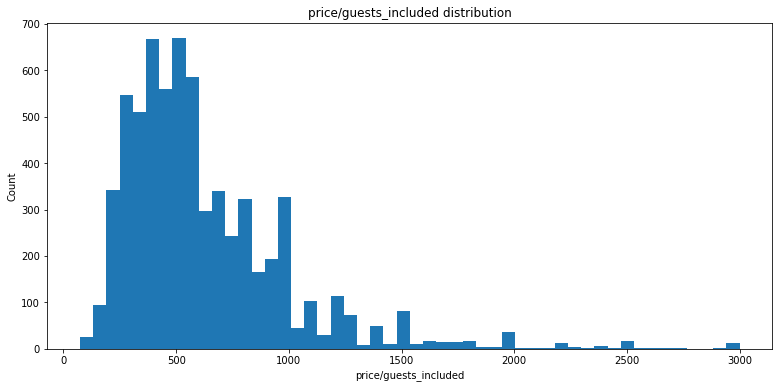

In [88]:
bins = 50
plt.subplots(figsize = [13,6])

plt.hist(df['price']/df['guests_included'], bins = bins)

plt.xlabel("price/guests_included")
plt.ylabel("Count")

plt.title("price/guests_included distribution");

Looks unimodal with a left-skew.


Proportions in percent:


,neighbourhood_cleansed
Grünerløkka,22.699666
Gamle Oslo,19.131491
Frogner,16.125114
St. Hanshaugen,12.860613
Sagene,10.977832
Nordstrand,3.127847
Nordre Aker,2.839356
Vestre Aker,2.626784
Ullern,1.943517
Østensjø,1.882782


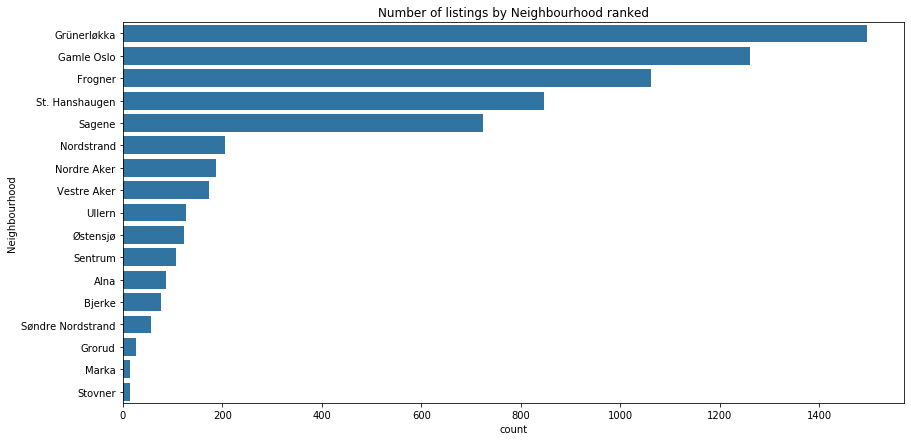

In [90]:
plt.subplots(figsize = [14,7])

sns.countplot(data = df, y = 'neighbourhood_cleansed', color = base_color, 
              order = df['neighbourhood_cleansed'].value_counts().index)

plt.ylabel('Neighbourhood')

plt.title("Number of listings by Neighbourhood ranked");

print('\nProportions in percent:')
pd.DataFrame(100*df['neighbourhood_cleansed'].value_counts()/df['neighbourhood_cleansed'].value_counts().sum())

We see that most of the listings are in the top 5 neighbourhoods.

A closer look at top 10 shows the same:

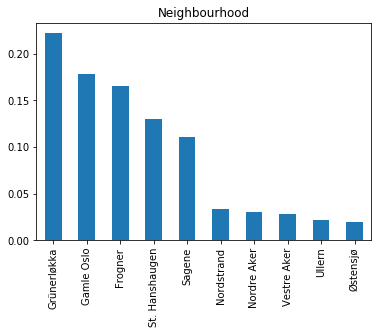

In [57]:
count_vals = pd.Series(df['neighbourhood_cleansed'].value_counts())

# bar chart of the proportion of the top 10 neighbourhoods

(count_vals[:10]/df.shape[0]).plot(kind="bar");
plt.title("Neighbourhood");


Proportions in percent:


,bathrooms
1.0,88.672943
1.5,5.724264
2.0,4.221075
2.5,0.819921
0.0,0.227756
0.5,0.167021
3.0,0.075919
4.0,0.045551
4.5,0.030367
5.0,0.015184


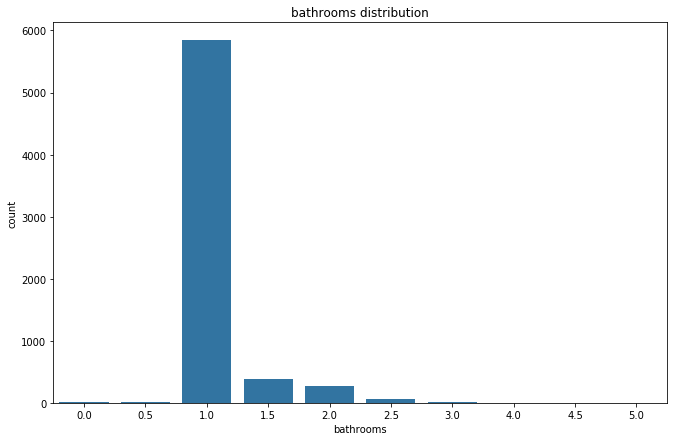

In [92]:
plt.subplots(figsize = [11,7])

sns.countplot(data = df, x = 'bathrooms', color = base_color);

plt.title("bathrooms distribution");

print('\nProportions in percent:')
pd.DataFrame(100*df['bathrooms'].value_counts()/df['bathrooms'].value_counts().sum())


Proportions in percent:


,host_is_superhost
0.0,84.055328
1.0,15.944672


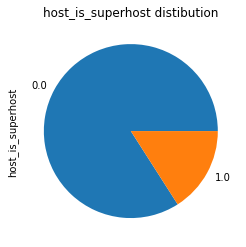

In [93]:
ax = df['host_is_superhost'].value_counts().plot(kind='pie')
ax.set_title('host_is_superhost distibution')

print('\nProportions in percent:')
pd.DataFrame(100*df['host_is_superhost'].value_counts()/df['host_is_superhost'].value_counts().sum())


Proportions in percent:


,guests_included
1,66.383237
2,23.762527
4,5.056180
3,3.355603
5,0.698451
6,0.576981
7,0.060735
8,0.060735
10,0.030367
9,0.015184


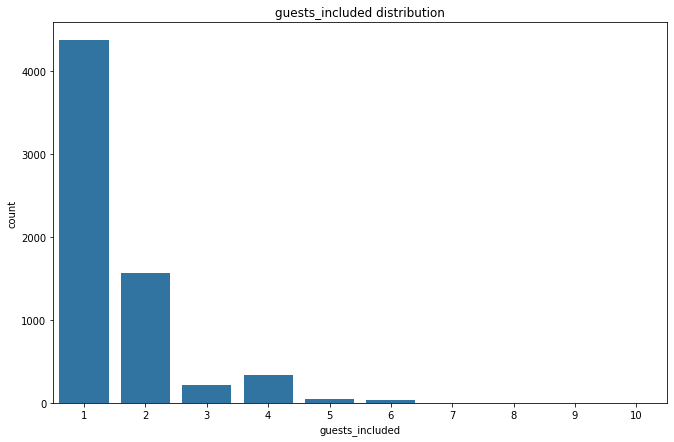

In [94]:
plt.subplots(figsize = [11,7])

sns.countplot(data = df, x = 'guests_included', color = base_color);

plt.title("guests_included distribution");

print('\nProportions in percent:')
pd.DataFrame(100*df['guests_included'].value_counts()/df['guests_included'].value_counts().sum())

In [95]:
df.guests_included.isna().sum()

0


Proportions in percent:


,minimum_nights
2 days,37.792287
1 day,23.398117
3 days,18.114182
4 days,7.014880
5 days,5.542059
7 days,2.778621
15-30 days,1.685393
6 days,1.594291
8-14 days,1.488005
31 days+,0.592165


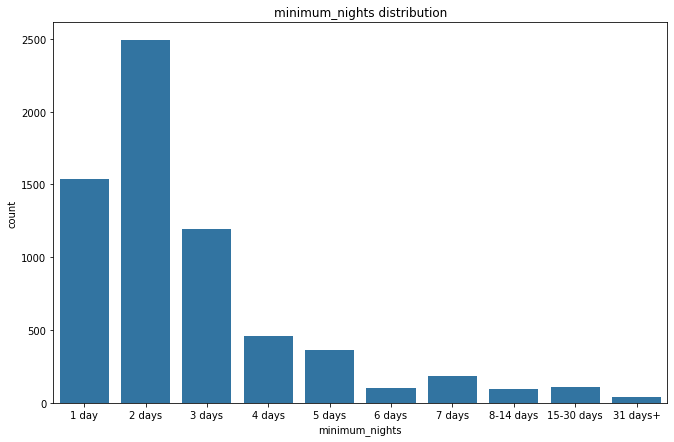

In [96]:
plt.subplots(figsize = [11,7])

sns.countplot(data = df, x = 'minimum_nights', color = base_color);

plt.title("minimum_nights distribution");

print('\nProportions in percent:')
pd.DataFrame(100*df['minimum_nights'].value_counts()/df['minimum_nights'].value_counts().sum())

In [97]:
counts = pd.DataFrame(df.groupby('neighbourhood_cleansed').count())
sums = pd.DataFrame(df.groupby('neighbourhood_cleansed').sum())
means = pd.DataFrame(df.groupby('neighbourhood_cleansed').mean())
medians = pd.DataFrame(df.groupby('neighbourhood_cleansed').median())

In [98]:
df.describe()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,bathrooms,price,cleaning_fee,guests_included,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,review_range_days,host_since_year
count,6579.000000,6579.000000,6579.000000,6586.000000,6586.000000,6586.000000,4960.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6586.000000,6579.000000
mean,0.159447,0.998936,0.396109,0.747039,1.084573,828.573034,314.202621,1.525053,23.029912,7.837686,2017.247647,2018.299727,95.677801,9.751442,9.523231,9.770878,9.844974,9.698451,9.600516,0.334346,0.004555,0.005314,1.682508,1.093480,1.052080,2015.243046
std,0.366120,0.032604,0.489125,0.434742,0.289501,498.022444,274.262712,0.945144,45.822955,15.335882,1.505701,1.071785,6.320884,0.653489,0.869717,0.638817,0.556144,0.588052,0.712824,0.471797,0.067343,0.072711,2.722641,1.551957,1.374965,1.852265
min,0.000000,0.000000,0.000000,0.000000,0.000000,83.000000,0.000000,1.000000,1.000000,0.000000,2011.000000,2013.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.010000,0.000000,2009.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,504.000000,150.000000,1.000000,3.000000,0.000000,2016.000000,2018.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.190000,0.000000,2014.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,706.000000,252.000000,1.000000,8.000000,2.000000,2017.000000,2019.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,2015.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,991.000000,450.000000,2.000000,22.000000,8.000000,2019.000000,2019.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.000000,1.300000,2.000000,2016.000000
max,1.000000,1.000000,1.000000,1.000000,5.000000,11997.000000,5000.000000,10.000000,809.000000,143.000000,2019.000000,2019.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.000000,1.000000,33.000000,13.620000,8.000000,2019.000000


In [105]:
cols_of_interest = ['price', 'guests_included', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
       'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
       'review_scores_value']
df_test = pd.DataFrame(means[cols_of_interest])
df_test

,price,guests_included,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
neighbourhood_cleansed,,,,,,,,,,
Alna,514.712644,1.574713,15.206897,94.482759,9.643678,9.436782,9.655172,9.724138,9.160920,9.459770
Bjerke,618.868421,1.552632,14.671053,94.802632,9.684211,9.473684,9.776316,9.789474,9.434211,9.552632
Frogner,925.365348,1.530132,29.752354,95.025424,9.692090,9.491525,9.742938,9.798493,9.889831,9.552731
Gamle Oslo,831.713492,1.502381,27.246825,95.776190,9.761111,9.528571,9.756349,9.856349,9.592857,9.604762
Grorud,573.370370,1.296296,10.888889,95.666667,9.777778,9.444444,9.888889,9.851852,9.259259,9.481481
Grünerløkka,793.437458,1.486288,23.064883,96.050167,9.785953,9.551839,9.776589,9.883612,9.755853,9.638127
Marka,1021.428571,1.857143,13.714286,95.857143,9.857143,9.428571,9.785714,9.785714,9.500000,9.428571
Nordre Aker,828.117647,1.663102,15.513369,95.957219,9.695187,9.588235,9.828877,9.818182,9.540107,9.588235
Nordstrand,946.300971,1.757282,23.582524,96.461165,9.839806,9.635922,9.902913,9.922330,9.611650,9.684466


In [106]:
g=pd.DataFrame(df_test).reset_index(drop=True)

In [107]:
df_geo = df_geo.sort_values('neighbourhood').reset_index(drop=True)

In [108]:
df_geo_full = pd.concat([df_geo, g], axis=1)

In [118]:
df_geo_full['price_per_guest'] = df_geo_full['price']/ df_geo_full['guests_included']

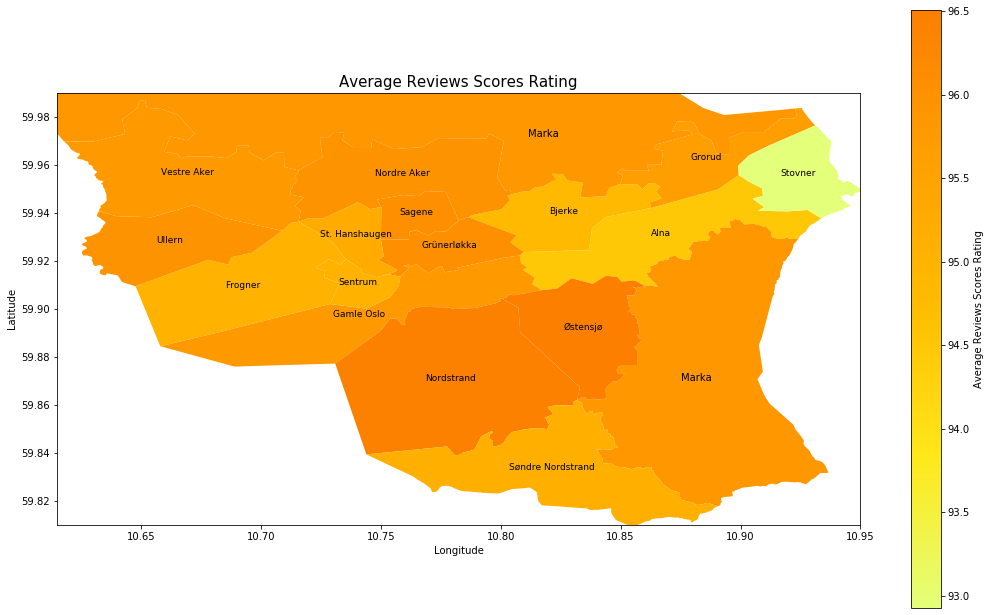

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='review_scores_rating', ax=ax, legend=True, 
                 cmap='Wistia', 
                 legend_kwds={'label': "Average Reviews Scores Rating", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average Reviews Scores Rating',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center', fontsize=9)

In [111]:
unique_guests_included_values = list(df.guests_included.value_counts().index.sort_values())

df.groupby('guests_included')['price'].mean()/unique_guests_included_values

guests_included
1     743.390210
2     426.066134
3     367.920060
4     349.729730
5     293.826087
6     273.644737
7     253.892857
8     238.750000
9     144.666667
10    875.000000
Name: price, dtype: float64

In [113]:
list(df.guests_included.value_counts().index.sort_values())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [114]:
df.guests_included.value_counts()

1     4372
2     1565
4      333
3      221
5       46
6       38
7        4
8        4
10       2
9        1
Name: guests_included, dtype: int64

In [115]:
df.loc[df.guests_included == 9]

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,bathrooms,amenities,price,security_deposit,cleaning_fee,guests_included,minimum_nights,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,review_range_days,host_since_year
568,not specified,NaN,0.0,1.0,1.0,Alna,1,House,Entire home/apt,2.0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",1302.0,$0.00,0.0,9,5 days,7,1,2016.0,2019.0,97.0,10.0,8.0,10.0,10.0,9.0,10.0,0,moderate,0,0,1,0.2,3.0,2014.0


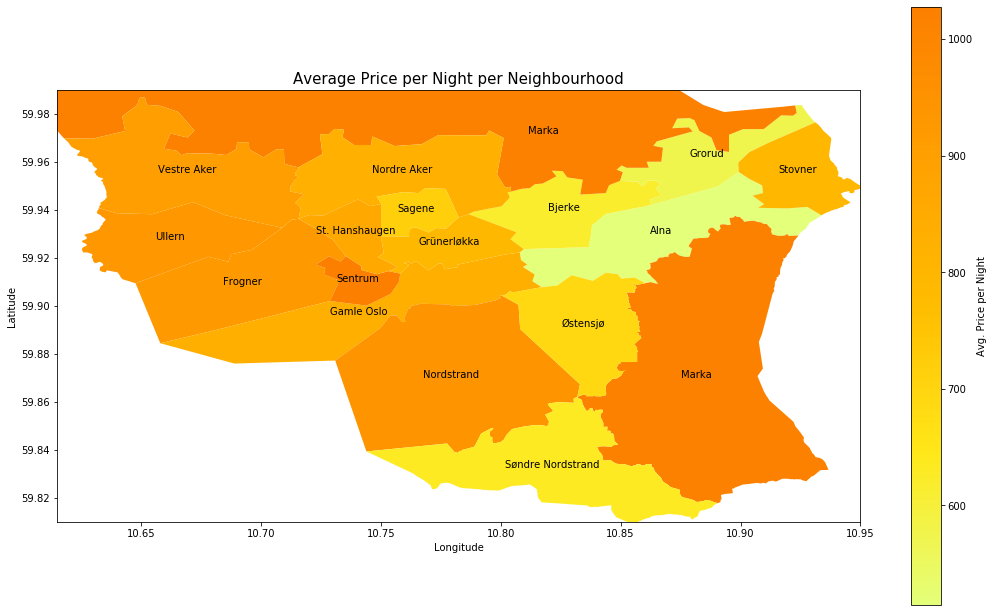

In [116]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='price', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Avg. Price per Night", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average Price per Night per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

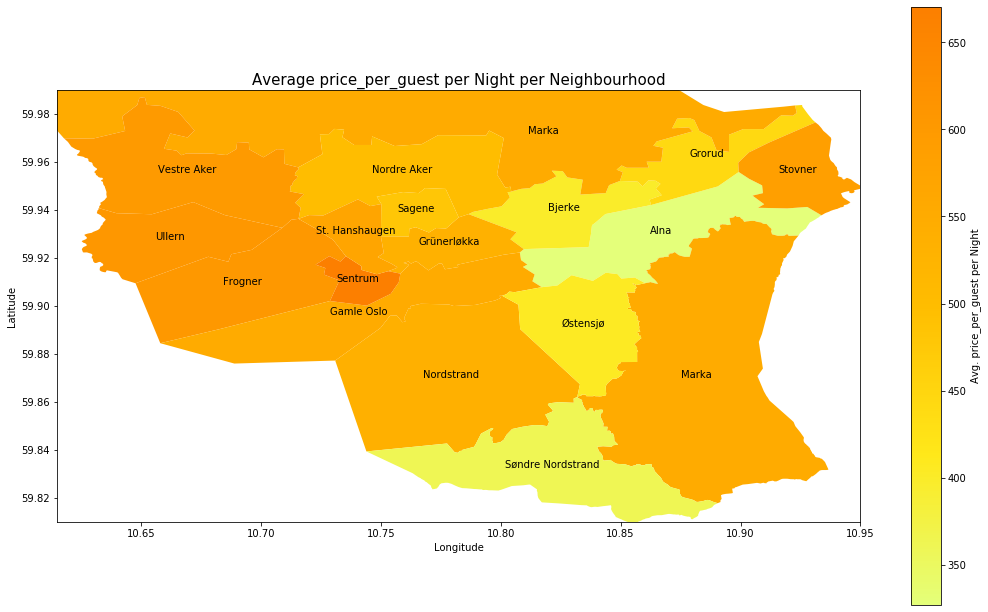

In [119]:
fig, ax = plt.subplots(1, 1, figsize=(18, 11))
ax.set(xlim=(10.615, 10.95), ylim=(59.81, 59.99))

ax.text(10.875, 59.87, 'Marka')

df_geo_full.plot(column='price_per_guest', ax=ax, legend=True, cmap='Wistia', legend_kwds={'label': "Avg. price_per_guest per Night", 
                                                                  'orientation': "vertical"})

plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.xticks([10.7, 10.8, 10.9])
#plt.yticks([59.8, 59.9, 60.0])
plt.suptitle('Marka', y=0.73, fontsize=10)

plt.title('Average price_per_guest per Night per Neighbourhood',  fontsize=15);


for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

In [115]:
df.price.mean()

925.8301952580196

In [302]:
df.price.isna().sum()

0

In [321]:
df.select_dtypes(include=['float', 'int'])

,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_since_year
0,0.0,1.0,1.0,1.0,0.0,59.91234,10.72384,1.0,2.0,3.0,2000.0,10000.0,25000.0,0.0,300.0,0.0,3.0,300.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.49,2010.0
1,1.0,2.0,2.0,1.0,0.0,59.91839,10.71457,0.5,1.0,1.0,385.0,NaN,NaN,0.0,101.0,101.0,2.0,4.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.67,2012.0
2,0.0,2.0,2.0,1.0,0.0,59.93898,10.77360,1.0,1.0,1.0,1009.0,9172.0,27516.0,1834.0,550.0,183.0,30.0,600.0,94.0,9.0,9.0,10.0,10.0,9.0,9.0,0.07,2010.0
3,0.0,1.0,1.0,1.0,1.0,59.90611,10.78000,1.0,1.0,2.0,504.0,2524.0,7572.0,NaN,252.0,202.0,4.0,730.0,95.0,9.0,10.0,10.0,10.0,9.0,10.0,0.46,2011.0
4,0.0,1.0,1.0,1.0,1.0,59.92478,10.71649,1.5,3.0,0.0,1917.0,22213.0,80773.0,NaN,NaN,0.0,7.0,31.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.13,2011.0
5,1.0,2.0,2.0,1.0,1.0,59.91265,10.77263,1.0,2.0,3.0,789.0,NaN,NaN,1000.0,600.0,100.0,1.5,1125.0,95.0,10.0,9.0,9.0,10.0,9.0,9.0,0.59,2010.0
6,0.0,1.0,1.0,1.0,0.0,59.93075,10.73261,1.0,1.0,1.0,761.0,3938.0,15105.0,1010.0,303.0,303.0,5.0,730.0,98.0,10.0,9.0,10.0,10.0,10.0,10.0,0.21,2011.0
7,0.0,1.0,1.0,1.0,0.0,59.91975,10.75466,1.0,1.0,4.0,1348.0,6879.0,NaN,917.0,367.0,183.0,3.0,365.0,97.0,9.0,10.0,9.0,10.0,9.0,9.0,0.19,2011.0
8,0.0,0.0,0.0,1.0,1.0,59.90711,10.78600,1.0,3.0,3.0,1000.0,NaN,NaN,1000.0,250.0,200.0,14.0,360.0,91.0,9.0,9.0,10.0,10.0,9.0,9.0,2.18,2011.0
9,1.0,2.0,2.0,1.0,1.0,59.92187,10.74817,1.0,1.0,1.0,660.0,NaN,NaN,0.0,303.0,252.0,4.0,365.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.36,2011.0


In [328]:
def prepare_variables(df):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no Prices
    2. Create X as all the columns that are not the Price column
    3. Create y as the Price column
    4. Drop the Price column from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    # Drop rows with missing price values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']

    #Drop respondent and expected salary columns
    X = df.drop(['id', 'listing_url', 'picture_url', 'host_id', 'host_url', 'host_verifications', 'price', 'longitude', 'latitude', 'host_listings_count', 'host_total_listings_count',
                'beds', 'bedrooms', 'weekly_price', 'monthly_price', 'extra_people',
                'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = X.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        X[col].fillna((X[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = X.select_dtypes(include=['category']).copy().columns
    for var in cat_vars:
        # for each cat add dummy var, drop original column
        X = pd.concat([X.drop(var, axis=1), pd.get_dummies(X[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    return X, y
    
    

In [329]:
X, y = prepare_variables(df)

In [335]:
X = X.select_dtypes(include=['float', 'int'])

In [330]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test


In [342]:
cutoffs = [3000, 2000, 1000, 500, 250, 100, 50, 30]

In [345]:
X

,host_is_superhost,host_has_profile_pic,host_identity_verified,bathrooms,security_deposit,cleaning_fee,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,host_since_year
0,0.000000,1.000000,0.000000,1.0,0.00000,300.000000,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.49,2010.000000
1,1.000000,1.000000,0.000000,0.5,0.00000,101.000000,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0.67,2012.000000
2,0.000000,1.000000,0.000000,1.0,1834.00000,550.000000,94.0,9.0,9.0,10.0,10.0,9.0,9.0,0.07,2010.000000
3,0.000000,1.000000,1.000000,1.0,1378.59709,252.000000,95.0,9.0,10.0,10.0,10.0,9.0,10.0,0.46,2011.000000
4,0.000000,1.000000,1.000000,1.5,1378.59709,316.713024,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.13,2011.000000
5,1.000000,1.000000,1.000000,1.0,1000.00000,600.000000,95.0,10.0,9.0,9.0,10.0,9.0,9.0,0.59,2010.000000
6,0.000000,1.000000,0.000000,1.0,1010.00000,303.000000,98.0,10.0,9.0,10.0,10.0,10.0,10.0,0.21,2011.000000
7,0.000000,1.000000,0.000000,1.0,917.00000,367.000000,97.0,9.0,10.0,9.0,10.0,9.0,9.0,0.19,2011.000000
8,0.000000,1.000000,1.000000,1.0,1000.00000,250.000000,91.0,9.0,9.0,10.0,10.0,9.0,9.0,2.18,2011.000000
9,1.000000,1.000000,1.000000,1.0,0.00000,303.000000,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0.36,2011.000000


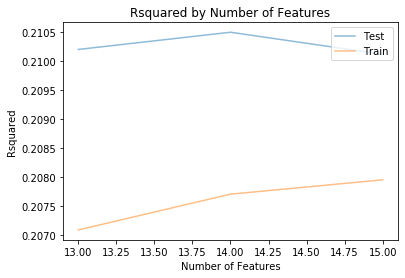

In [343]:
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [307]:
y.head()

0    2000.0
1     385.0
2    1009.0
3     504.0
4    1917.0
Name: price, dtype: float64

In [308]:
X.head()

,id,host_id,host_response_time,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,...,first_review_2019-10-03,first_review_2019-10-04,first_review_2019-10-05,first_review_2019-10-06,first_review_2019-10-07,first_review_2019-10-08,first_review_2019-10-09,first_review_2019-10-10,first_review_2019-10-11,first_review_2019-10-12,first_review_2019-10-13,first_review_2019-10-14,first_review_2019-10-15,first_review_2019-10-17,first_review_2019-10-18,first_review_2019-10-19,first_review_2019-10-20,first_review_2019-10-21,first_review_2019-10-22,first_review_2019-10-23,first_review_2019-10-24,first_review_2019-10-25,first_review_2019-10-26,first_review_2019-10-27,first_review_2019-10-28,first_review_2019-10-30,first_review_2019-10-31,first_review_2019-11-01,first_review_2019-11-02,first_review_2019-11-03,first_review_2019-11-04,first_review_2019-11-05,first_review_2019-11-06,first_review_2019-11-07,first_review_2019-11-08,first_review_2019-11-09,first_review_2019-11-10,first_review_2019-11-11,first_review_2019-11-12,first_review_2019-11-13,first_review_2019-11-15,first_review_2019-11-17,first_review_2019-11-18,first_review_2019-11-20,first_review_2019-11-21,first_review_2019-11-22,first_review_2019-11-23,first_review_2019-11-24,first_review_2019-11-25,first_review_2019-11-28
0,42932,187463,within an hour,0.0,1.0,1.0,1.0,0.0,59.91234,10.72384,0,Apartment,Entire home/apt,3,1.0,2.0,3.0,Real Bed,10000.000000,25000.000000,0.00000,300.000000,3,0.0,3 days,300,3,3,300,300,3.0,300.0,28,55,85,360,37,7,2019-06-19,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,moderate,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43198,4011871,within an hour,1.0,2.0,2.0,1.0,0.0,59.91839,10.71457,1,Apartment,Private room,3,0.5,1.0,1.0,Real Bed,5169.714078,16934.868597,0.00000,101.000000,1,101.0,2 days,4,2,2,4,4,2.0,4.0,0,0,0,0,36,3,2019-07-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,69964,175633,not specified,0.0,2.0,2.0,1.0,0.0,59.93898,10.77360,1,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,9172.000000,27516.000000,1834.00000,550.000000,2,183.0,15-30 days,600,30,30,600,600,30.0,600.0,28,58,88,363,7,0,2013-05-18,94.0,9.0,9.0,10.0,10.0,9.0,9.0,0,moderate,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,71725,368229,within a day,0.0,1.0,1.0,1.0,1.0,59.90611,10.78000,1,Apartment,Private room,3,1.0,1.0,2.0,Real Bed,2524.000000,7572.000000,1378.59709,252.000000,2,202.0,4 days,730,4,4,730,730,4.0,730.0,13,28,58,333,49,3,2019-11-09,95.0,9.0,10.0,10.0,10.0,9.0,10.0,0,moderate,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,77108,412523,within a day,0.0,1.0,1.0,1.0,1.0,59.92478,10.71649,0,Apartment,Entire home/apt,8,1.5,3.0,0.0,Real Bed,22213.000000,80773.000000,1378.59709,316.713024,6,0.0,7 days,31,7,7,31,31,7.0,31.0,16,46,76,351,14,0,2018-08-13,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
#df_geo = df_geo[(df_geo.neighbourhood!="Marka") & (df_geo.neighbourhood!="Søndre Nordstrand")]

fig, ax = plt.subplots(1, figsize=(17, 17))

df_geo.plot(ax=ax)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
ax.set(xlim=(10.615, 10.95), ylim=(59.835, 59.99))

df_test_sample = df_test.sample(3000)
sns.scatterplot(df_test_sample.longitude,df_test_sample.latitude,hue=df_test_sample.neighbourhood_cleansed, palette = 'muted');

for idx, row in df_geo.iterrows():
    plt.annotate(s=row['neighbourhood'], xy=row['geometry'].centroid.coords[0],
                 horizontalalignment='center')

In [ ]:
x = pd.DataFrame(df.neighbourhood_cleansed.value_counts() > 100)
y = list(x[x.neighbourhood_cleansed == True].index)

In [ ]:
df.neighbourhood_cleansed.isin(y).sum()

In [ ]:
df_test = df[df.neighbourhood_cleansed.isin(y)]


plt.figure(figsize=(14,8))
sns.scatterplot(df_test.longitude,df_test.latitude,hue=df_test.neighbourhood_cleansed, palette = 'muted');

In [ ]:
df.groupby('neighbourhood').mean()

In [ ]:
df_test.price.hist(bins=100)

In [ ]:
df_test.price.mean()

In [ ]:
df_test.describe()

In [ ]:
df_test.hist(figsize=(18, 15), bins=20, grid=False, layout=(7, 6))
sns.despine()
plt.suptitle('Numeric features distribution', fontsize=12)
plt.tight_layout(rect=[0, 0, 0.97, 0.97])

In [ ]:
df.neighbourhood_cleansed.value_counts()

In [ ]:
df.loc[:, df.columns.str.endswith('_cleansed')]

- Come up with three questions you are interested in answering.
- Extract the necessary data to answer these questions.
- Perform necessary cleaning, analysis, and modeling.
- Evaluate your results.